In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = 'competitive-data-science-predict-future-sales/'  # Replace with your actual dataset name

# Load items data
items = pd.read_csv(base_path + 'items.csv')

# Load shops data
shops = pd.read_csv(base_path + 'shops.csv')

# Load sales train data
train_data = pd.read_csv(base_path + 'sales_train.csv')

# Load item categories data
item_categories = pd.read_csv(base_path + 'item_categories.csv')

# Load item categories data
test_data = pd.read_csv(base_path + 'test.csv')


print("Items Info")
print(items.info())
print("Shops Info")
print(shops.info())
print("Sales Info")
print(train_data.info())
print("Categories Info")
print(item_categories.info())

Items Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
Shops Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Sales Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3

In [3]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Shops
def shop_name2city(sn):
    sn = sn.split()
    if sn[0] == 'Цифровой' or sn[0] == 'Интернет-магазин': sn = 'Internet'
    if sn[0] == '!': sn = sn[1]
    else: sn = sn[0] 
    return sn

shops['city_name'] = shops['shop_name'].apply(shop_name2city)
shops['city_id'] = LabelEncoder().fit_transform(shops['city_name']).astype('int8')
shops.head()

,shop_name,shop_id,city_name,city_id
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0
2,"Адыгея ТЦ ""Мега""",2,Адыгея,2
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,3
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,4


In [4]:
item_categories['product_category'] = item_categories['item_category_name'].str.split(n=1, expand=True)[0]
item_categories['product_category_id'] = LabelEncoder().fit_transform(item_categories['product_category'])
item_categories.head()

,item_category_name,item_category_id,product_category,product_category_id
0,PC - Гарнитуры/Наушники,0,PC,0
1,Аксессуары - PS2,1,Аксессуары,1
2,Аксессуары - PS3,2,Аксессуары,1
3,Аксессуары - PS4,3,Аксессуары,1
4,Аксессуары - PSP,4,Аксессуары,1


In [5]:
train_data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [6]:

train_data = train_data[train_data['item_price'] >= 0]
train_data = train_data[train_data['item_cnt_day'] >= 0]
train_data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06
mean,1.456976e+01,3.300295e+01,1.020028e+04,8.894668e+02,1.248337e+00
std,9.422951e+00,1.622543e+01,6.324396e+03,1.727499e+03,2.619586e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


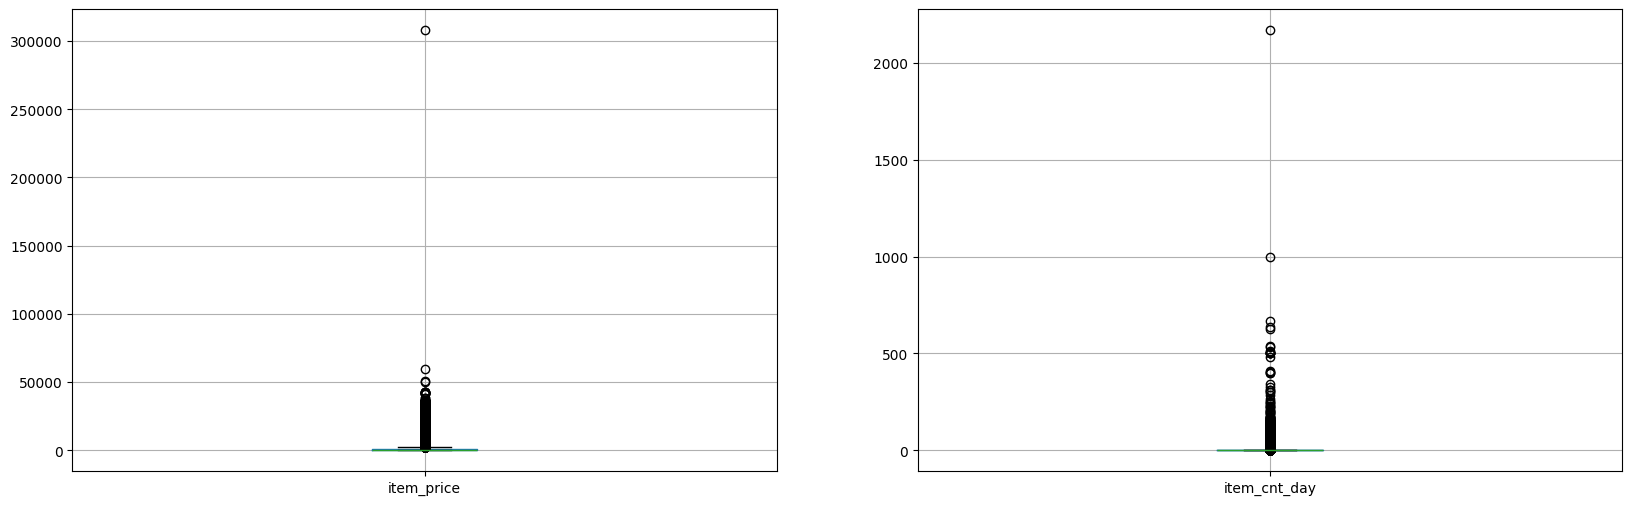

In [7]:
fig = plt.figure(figsize =(20, 6))

plt.subplot(121)
train_data.boxplot(['item_price'])

plt.subplot(122)
train_data.boxplot(['item_cnt_day'])

plt.show()

In [8]:

train_data = train_data[train_data['item_price'] <= 50000]
train_data = train_data[train_data['item_cnt_day'] <= 1000]

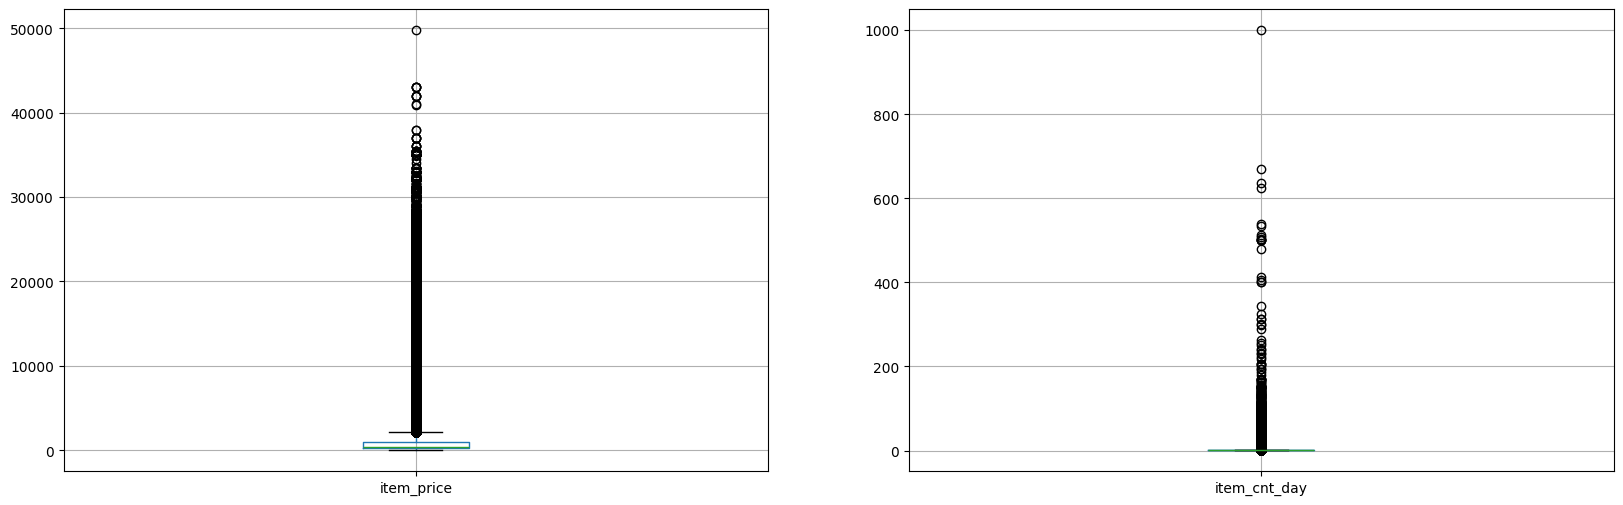

In [9]:
fig = plt.figure(figsize =(20, 6))

plt.subplot(121)
train_data.boxplot(['item_price'])

plt.subplot(122)
train_data.boxplot(['item_cnt_day'])

plt.show()

In [10]:
train_data['date'] = pd.to_datetime(train_data["date"], format='%d.%m.%Y')
        
# Extract month and create new column
train_data['month'] = train_data['date'].dt.month
train_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,2013-01-02,0,59,22154,999.00,1.0,1
1,2013-01-03,0,25,2552,899.00,1.0,1
3,2013-01-06,0,25,2554,1709.05,1.0,1
4,2013-01-15,0,25,2555,1099.00,1.0,1
5,2013-01-10,0,25,2564,349.00,1.0,1
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,10
2935845,2015-10-09,33,25,7460,299.00,1.0,10
2935846,2015-10-14,33,25,7459,349.00,1.0,10
2935847,2015-10-22,33,25,7440,299.00,1.0,10


In [11]:
from itertools import product
train = []

for i in range(0,34):
    
    cur_shops = train_data.loc[train_data["date_block_num"] == i, "shop_id"].unique()
    
    cur_items = train_data.loc[train_data["date_block_num"] == i, "item_id"].unique()
    
    train.append(np.array(list(product(*[[i],cur_shops, cur_items]))))
    
index_feats = ["date_block_num", "shop_id", "item_id"]
train = pd.DataFrame(np.vstack(train), columns=index_feats)

train
     

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10884455,33,21,7635
10884456,33,21,7638
10884457,33,21,7640
10884458,33,21,7632


In [12]:
idx_columns = ['date_block_num', 'shop_id', 'item_id']
cmin = 0
cmax = 20

In [13]:
temp = train_data.groupby(idx_columns).agg({
    'item_price': "mean",
    'item_cnt_day': "sum"
})
temp.reset_index(inplace=True)
temp = temp.rename(columns={'item_cnt_day': 'item_cnt_month'})
        
train_df = pd.merge(train, temp, on=idx_columns, how='left')
        
train_df['item_cnt_month'] = train_df['item_cnt_month'].astype('float32').fillna(0.).clip(cmin, cmax)
train_df['item_price'] = train_df['item_price'].astype('float32').fillna(0.)

train_df

,date_block_num,shop_id,item_id,item_price,item_cnt_month
0,0,59,22154,999.0,1.0
1,0,59,2552,0.0,0.0
2,0,59,2554,0.0,0.0
3,0,59,2555,0.0,0.0
4,0,59,2564,0.0,0.0
...,...,...,...,...,...
10884455,33,21,7635,0.0,0.0
10884456,33,21,7638,0.0,0.0
10884457,33,21,7640,0.0,0.0
10884458,33,21,7632,0.0,0.0


In [14]:

# Add column for count of items sold.

df_tmp = train_data[train_data['item_cnt_day'] > 0].groupby(idx_columns).agg({'item_cnt_day': 'count'})
df_tmp.reset_index(inplace=True)
df_tmp = df_tmp.rename(columns={'item_cnt_day': 'item_rate_month'})
        
train_df = pd.merge(train_df, df_tmp, on=idx_columns, how='left')
        
train_df['item_rate_month'] = train_df['item_rate_month'].astype('float32').fillna(0.)
   


train_df.sample(5)

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_rate_month
8621385,24,30,3079,0.0,0.0,0.0
1512363,4,28,8413,0.0,0.0,0.0
4021593,10,57,7739,499.0,1.0,1.0
9925779,29,4,6834,0.0,0.0,0.0
5642604,15,3,10312,0.0,0.0,0.0


In [15]:
import pandas as pd
import numpy as np

def create_date_avg_item_cnt(df, date_column='date_block_num'):
    # Calculate the average item count for each month
    monthly_avg = df.groupby(date_column)['item_cnt_month'].mean().reset_index()
    monthly_avg = monthly_avg.rename(columns={'item_cnt_month': 'date_avg_item_cnt'})
    
    # Merge the new feature back to the original dataframe
    df = df.merge(monthly_avg, on=date_column, how='left')
    
    
    return df

# Usage
train_df = create_date_avg_item_cnt(train_df, date_column='date_block_num')

In [16]:
import pandas as pd
import numpy as np

def create_date_item_avg_item_cnt(df):
    # Calculate the average item count for each month and item
    monthly_item_avg = df.groupby(['date_block_num', 'item_id'])['item_cnt_month'].mean().reset_index()
    monthly_item_avg = monthly_item_avg.rename(columns={'item_cnt_month': 'date_item_avg_item_cnt'})
    
    # Merge the new feature back to the original dataframe
    df = df.merge(monthly_item_avg, on=['date_block_num', 'item_id'], how='left')
    
    
    return df

# Usage
train_df = create_date_item_avg_item_cnt(train_df)

In [17]:
import pandas as pd
import numpy as np

def create_date_shop_avg_item_cnt(df):
    # Calculate the average item count for each month, item, and shop
    monthly_shop_item_avg = df.groupby(['date_block_num', 'item_id', 'shop_id'])['item_cnt_month'].mean().reset_index()
    monthly_shop_item_avg = monthly_shop_item_avg.rename(columns={'item_cnt_month': 'date_shop_avg_item_cnt'})
    
    # Merge the new feature back to the original dataframe
    df = df.merge(monthly_shop_item_avg, on=['date_block_num', 'item_id', 'shop_id'], how='left')
    
    
    return df

# Usage
train_df = create_date_shop_avg_item_cnt(train_df)

In [18]:
all_about_items = pd.merge(items, item_categories,on='item_category_id',how='left')

In [19]:

train_df = pd.merge(train_df, shops, on="shop_id", how="left")
train_df = pd.merge(train_df, all_about_items, on="item_id", how="left")


In [20]:
train_df.drop(['shop_name','city_name','item_name','item_category_name','product_category'],axis=1,inplace=True)

In [21]:
train_df.sample(3)

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_rate_month,date_avg_item_cnt,date_item_avg_item_cnt,date_shop_avg_item_cnt,city_id,item_category_id,product_category_id
6890839,19,41,13548,0.00000,0.0,0.0,0.291188,0.176471,0.0,19,69,10
8404775,23,24,7808,1501.72998,1.0,1.0,0.445127,0.780000,1.0,14,23,5
1238613,3,3,14584,0.00000,0.0,0.0,0.282176,0.111111,0.0,3,55,9


In [22]:
test_data['date_block_num'] = 34
test_data['item_price'] = 0
test_data['item_cnt_month'] = 0
test_data['item_rate_month'] = 0
test_data['date_avg_item_cnt'] = 0
test_data['date_item_avg_item_cnt'] = 0
test_data['date_shop_avg_item_cnt'] = 0
test_data['date_shop_item_avg_item_cnt'] = 0
test_data['date_city_avg_item_cnt'] = 0
test_data['date_item_city_avg_item_cnt'] = 0
test_data['item_avg_item_price'] = 0
test_data['date_item_avg_item_price'] = 0



test_data.drop('ID',axis=1,inplace=True)
test_data.head()


,shop_id,item_id,date_block_num,item_price,item_cnt_month,item_rate_month,date_avg_item_cnt,date_item_avg_item_cnt,date_shop_avg_item_cnt,date_shop_item_avg_item_cnt,date_city_avg_item_cnt,date_item_city_avg_item_cnt,item_avg_item_price,date_item_avg_item_price
0,5,5037,34,0,0,0,0,0,0,0,0,0,0,0
1,5,5320,34,0,0,0,0,0,0,0,0,0,0,0
2,5,5233,34,0,0,0,0,0,0,0,0,0,0,0
3,5,5232,34,0,0,0,0,0,0,0,0,0,0,0
4,5,5268,34,0,0,0,0,0,0,0,0,0,0,0


In [23]:

test_data = pd.merge(test_data, shops, on="shop_id", how="left")
test_data = pd.merge(test_data, all_about_items, on="item_id", how="left")
test_data.drop(['shop_name','city_name','item_name','item_category_name','product_category'],axis=1,inplace=True)

In [24]:
test_data.shape

(214200, 17)

In [25]:
test_data.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_price', 'item_cnt_month',
       'item_rate_month', 'date_avg_item_cnt', 'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 'date_shop_item_avg_item_cnt',
       'date_city_avg_item_cnt', 'date_item_city_avg_item_cnt',
       'item_avg_item_price', 'date_item_avg_item_price', 'city_id',
       'item_category_id', 'product_category_id'],
      dtype='object')

In [26]:
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_month',
       'item_rate_month', 'date_avg_item_cnt', 'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 'city_id', 'item_category_id',
       'product_category_id'],
      dtype='object')

In [27]:
for x in train_df.columns:
  if x not in test_data.columns:
    print(x)

In [28]:
test_data = test_data[['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_month',
       'item_rate_month', 'date_avg_item_cnt', 'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 'city_id', 'item_category_id',
       'product_category_id']]

In [29]:
df = pd.concat([train_df, test_data], axis=0, ignore_index=True)
df

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_rate_month,date_avg_item_cnt,date_item_avg_item_cnt,date_shop_avg_item_cnt,city_id,item_category_id,product_category_id
0,0,59,22154,999.0,1.0,1.0,0.348179,0.400000,1.0,30,37,7
1,0,59,2552,0.0,0.0,0.0,0.348179,0.022222,0.0,30,58,9
2,0,59,2554,0.0,0.0,0.0,0.348179,0.022222,0.0,30,58,9
3,0,59,2555,0.0,0.0,0.0,0.348179,0.044444,0.0,30,56,9
4,0,59,2564,0.0,0.0,0.0,0.348179,0.111111,0.0,30,59,9
...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,0.0,0.0,0.000000,0.000000,0.0,21,55,9
11098656,34,45,16188,0.0,0.0,0.0,0.000000,0.000000,0.0,21,64,10
11098657,34,45,15757,0.0,0.0,0.0,0.000000,0.000000,0.0,21,55,9
11098658,34,45,19648,0.0,0.0,0.0,0.000000,0.000000,0.0,21,40,7


In [30]:
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_month',
       'item_rate_month', 'date_avg_item_cnt', 'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 'city_id', 'item_category_id',
       'product_category_id'],
      dtype='object')

In [31]:
test_data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_month',
       'item_rate_month', 'date_avg_item_cnt', 'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 'city_id', 'item_category_id',
       'product_category_id'],
      dtype='object')

In [32]:
df['first_sale_date'] = df.groupby('item_id')['date_block_num'].min()
df['first_sale_date'].fillna(34, inplace=True)
df['first_sale_date'] = df['first_sale_date'].astype('int8')

In [33]:
df['month'] = (df['date_block_num']%12 + 1).astype('int8')

In [34]:
df['new_item'] = df['first_sale_date'] ==  df['date_block_num']

In [35]:
df['first_sale_date'] = abs(df['date_block_num'] - df['first_sale_date'])

In [36]:
import pandas as pd

def add_city_item_count_mean(df, item_count_col='item_cnt_month'):
    # Calculate the mean item count for each city-item combination
    city_item_mean = df.groupby(['item_id', 'city_id'])[item_count_col].mean().reset_index()
    city_item_mean = city_item_mean.rename(columns={item_count_col: 'city_item_count_mean'})
    
    # Merge the new feature back to the original dataframe
    df = df.merge(city_item_mean, on=['item_id', 'city_id'], how='left')
    
    return df

# Usage
# Assuming your DataFrame is named 'df' and contains 'item_id', 'city_id', and 'item_cnt_month' columns
df = add_city_item_count_mean(df)

In [41]:
import pandas as pd

def add_date_item_shop_avg_item_price(df, item_count_col='item_price'):
    # Calculate the mean item count for each city-item combination
    city_item_mean = df.groupby(['date_block_num', 'item_id', 'shop_id'])[item_count_col].mean().reset_index()
    city_item_mean = city_item_mean.rename(columns={item_count_col: 'date_item_shop_avg_item_price'})
    
    # Merge the new feature back to the original dataframe
    df = df.merge(city_item_mean, on=['date_block_num', 'item_id', 'shop_id'], how='left')
    
    return df

# Usage
# Assuming your DataFrame is named 'df' and contains 'item_id', 'city_id', and 'item_cnt_month' columns
df = add_date_item_shop_avg_item_price(df)

In [42]:
def add_item_shop_avg_item_price(df, item_count_col='item_price'):
    # Calculate the mean item count for each city-item combination
    city_item_mean = df.groupby(['item_id', 'shop_id'])[item_count_col].mean().reset_index()
    city_item_mean = city_item_mean.rename(columns={item_count_col: 'item_shop_avg_item_price'})
    
    # Merge the new feature back to the original dataframe
    df = df.merge(city_item_mean, on=['item_id', 'shop_id'], how='left')
    
    return df

# Usage
# Assuming your DataFrame is named 'df' and contains 'item_id', 'city_id', and 'item_cnt_month' columns
df = add_item_shop_avg_item_price(df)

In [43]:
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_rate_month,date_avg_item_cnt,date_item_avg_item_cnt,date_shop_avg_item_cnt,city_id,...,product_category_id,first_sale_date,month,new_item,city_item_count_mean,date_item_shop_avg_item_price_x,item_shop_avg_item_price_x,city_item_count_month_mean,date_item_shop_avg_item_price_y,item_shop_avg_item_price_y
0,0,59,22154,999.0,1.0,1.0,0.348179,0.400000,1.0,30,...,7,20,1,False,0.076923,999.0,76.846154,1.0,999.0,76.846154
1,0,59,2552,0.0,0.0,0.0,0.348179,0.022222,0.0,30,...,9,15,1,False,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,0,59,2554,0.0,0.0,0.0,0.348179,0.022222,0.0,30,...,9,19,1,False,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,0,59,2555,0.0,0.0,0.0,0.348179,0.044444,0.0,30,...,9,18,1,False,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,0,59,2564,0.0,0.0,0.0,0.348179,0.111111,0.0,30,...,9,20,1,False,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [44]:
import pandas as pd

def add_city_item_count_mounth_mean(df, item_count_col='item_cnt_month'):
    # Calculate the mean item count for each city-item combination
    city_item_month_mean = df.groupby(['item_id', 'city_id', 'date_block_num'])[item_count_col].mean().reset_index()
    city_item_month_mean = city_item_month_mean.rename(columns={item_count_col: 'city_item_count_month_mean'})
    
    # Merge the new feature back to the original dataframe
    df = df.merge(city_item_month_mean, on=['item_id', 'city_id', 'date_block_num'], how='left')
    
    return df

# Usage
# Assuming your DataFrame is named 'df' and contains 'item_id', 'city_id', and 'item_cnt_month' columns
df = add_city_item_count_mounth_mean(df)

In [45]:
def add_item_lags(df, feature_name,nlags , lag_names_to_clip=[]):
        
        print('Adding item lags for', feature_name, '...')
        
    
        df_tmp = df[['date_block_num', 'shop_id', 'item_id', feature_name]]
    
        for i in range(nlags, 0, -1):
            lag_feature_name = feature_name +'_lag-' + str(i)
            lag_names_to_clip.append(lag_feature_name)
            df_shifted = df_tmp.copy()
            df_shifted.columns = ['date_block_num', 'shop_id', 'item_id', lag_feature_name]
            df_shifted['date_block_num'] += i
            df = pd.merge(df, df_shifted.drop_duplicates(), on=['date_block_num', 'shop_id', 'item_id'], how='left')
            
            df[lag_feature_name] = df[lag_feature_name].fillna(0).astype('float32')
        
        del df_tmp
        del df_shifted
        return df, lag_names_to_clip

In [46]:
def add_shop_lags(df, feature_name, nlags, lag_names_to_clip ):
        
        mean_feature_name = feature_name + '_mean'
        
        print('Adding lags for', mean_feature_name, '...')
    
        df_tmp = df[['date_block_num', 'shop_id', feature_name, mean_feature_name]]
    
        for i in range(nlags, 0, -1):
        
            lag_feature_name = mean_feature_name + '_lag-' + str(i)
            lag_names_to_clip.append(lag_feature_name)
        
            df_shifted = df_tmp.copy()
            df_shifted.columns = ['date_block_num', 'shop_id', feature_name, lag_feature_name]
            df_shifted['date_block_num'] += i
            df = pd.merge(df, df_shifted.drop_duplicates(), on=['date_block_num', 'shop_id', feature_name], how='left')
            df[lag_feature_name] = df[lag_feature_name].fillna(0).astype('float32')
        
        del df_tmp
        del df_shifted
        gc.collect()
        return df, lag_names_to_clip

In [47]:
nlags=3

df, lag_names_to_clip =  add_item_lags(df,'item_cnt_month', nlags)

df, lag_names_to_clip =  add_item_lags(df,'item_rate_month',nlags, lag_names_to_clip)

df, lag_names_to_clip =  add_item_lags(df,'item_price', nlags,lag_names_to_clip)

Adding item lags for item_cnt_month ...
Adding item lags for item_rate_month ...
Adding item lags for item_price ...


In [48]:
df, lag_names_to_clip =  add_item_lags(df,'date_avg_item_cnt',nlags, lag_names_to_clip)
df, lag_names_to_clip =  add_item_lags(df,'date_item_avg_item_cnt',nlags, lag_names_to_clip)
df, lag_names_to_clip =  add_item_lags(df,'date_shop_avg_item_cnt',nlags, lag_names_to_clip)

Adding item lags for date_avg_item_cnt ...
Adding item lags for date_item_avg_item_cnt ...
Adding item lags for date_shop_avg_item_cnt ...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11098660 entries, 0 to 11098659
Data columns (total 40 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   date_block_num                   int64  
 1   shop_id                          int64  
 2   item_id                          int64  
 3   item_price                       float64
 4   item_cnt_month                   float64
 5   item_rate_month                  float64
 6   date_avg_item_cnt                float64
 7   date_item_avg_item_cnt           float64
 8   date_shop_avg_item_cnt           float64
 9   city_id                          int8   
 10  item_category_id                 int64  
 11  product_category_id              int64  
 12  first_sale_date                  int64  
 13  month                            int8   
 14  new_item                         bool   
 15  city_item_count_mean             float64
 16  date_item_shop_avg_item_price_x  float64
 17  item_s

In [51]:
df.sample(10)

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_rate_month,date_avg_item_cnt,date_item_avg_item_cnt,date_shop_avg_item_cnt,city_id,...,date_avg_item_cnt_lag-1,date_item_avg_item_cnt_lag-3,date_item_avg_item_cnt_lag-2,date_item_avg_item_cnt_lag-1,date_shop_avg_item_cnt_lag-3,date_shop_avg_item_cnt_lag-2,date_shop_avg_item_cnt_lag-1,city_item_count_mean_lag-3,city_item_count_mean_lag-2,city_item_count_mean_lag-1
73744,0,27,4485,359.399994,5.0,5.0,0.348179,0.933333,5.0,14,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2492139,6,54,17274,98.000000,1.0,1.0,0.277345,0.043478,1.0,27,...,0.283763,0.022222,0.000000,0.043478,0.0,0.0,0.0,0.125000,0.000000,0.125000
6721224,18,58,5673,799.000000,1.0,1.0,0.255462,0.720000,1.0,29,...,0.273989,0.795918,0.714286,0.632653,0.0,0.0,0.0,0.590909,0.590909,0.590909
10998951,34,49,16174,0.000000,0.0,0.0,0.000000,0.000000,0.0,25,...,0.259152,0.071429,0.071429,0.090909,0.0,1.0,0.0,0.102041,0.102041,0.102041
1677590,4,53,12009,0.000000,0.0,0.0,0.265688,0.022222,0.0,26,...,0.282176,0.173913,0.195652,0.133333,0.0,0.0,0.0,0.093750,0.093750,0.093750
2113298,5,26,18826,349.000000,1.0,1.0,0.283763,0.500000,1.0,14,...,0.265688,0.500000,0.311111,0.377778,0.0,0.0,1.0,0.730000,0.730000,0.730000
8673946,24,55,8997,0.000000,0.0,0.0,0.318507,0.020000,0.0,1,...,0.000000,0.000000,0.020000,0.000000,0.0,0.0,0.0,0.000000,0.050000,0.000000
3949333,10,22,19576,0.000000,0.0,0.0,0.304005,0.066667,0.0,14,...,0.290701,0.088889,0.000000,0.065217,0.0,0.0,0.0,0.100402,0.000000,0.100402
3567412,9,13,4814,0.000000,0.0,0.0,0.290701,0.456522,0.0,9,...,0.308724,0.282609,1.311111,0.777778,0.0,0.0,0.0,0.083333,0.083333,0.083333
5803388,15,37,948,2599.000000,1.0,1.0,0.256109,0.326531,1.0,17,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [52]:
df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_month',
       'item_rate_month', 'date_avg_item_cnt', 'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 'city_id', 'item_category_id',
       'product_category_id', 'first_sale_date', 'month', 'new_item',
       'city_item_count_mean', 'date_item_shop_avg_item_price_x',
       'item_shop_avg_item_price_x', 'city_item_count_month_mean_x',
       'date_item_shop_avg_item_price_y', 'item_shop_avg_item_price_y',
       'city_item_count_month_mean_y', 'item_cnt_month_lag-3',
       'item_cnt_month_lag-2', 'item_cnt_month_lag-1', 'item_rate_month_lag-3',
       'item_rate_month_lag-2', 'item_rate_month_lag-1', 'item_price_lag-3',
       'item_price_lag-2', 'item_price_lag-1', 'date_avg_item_cnt_lag-3',
       'date_avg_item_cnt_lag-2', 'date_avg_item_cnt_lag-1',
       'date_item_avg_item_cnt_lag-3', 'date_item_avg_item_cnt_lag-2',
       'date_item_avg_item_cnt_lag-1', 'date_shop_avg_item_cnt_lag-3',
       'da

In [53]:
df.isna().sum()


date_block_num                     0
shop_id                            0
item_id                            0
item_price                         0
item_cnt_month                     0
item_rate_month                    0
date_avg_item_cnt                  0
date_item_avg_item_cnt             0
date_shop_avg_item_cnt             0
city_id                            0
item_category_id                   0
product_category_id                0
first_sale_date                    0
month                              0
new_item                           0
city_item_count_mean               0
date_item_shop_avg_item_price_x    0
item_shop_avg_item_price_x         0
city_item_count_month_mean_x       0
date_item_shop_avg_item_price_y    0
item_shop_avg_item_price_y         0
city_item_count_month_mean_y       0
item_cnt_month_lag-3               0
item_cnt_month_lag-2               0
item_cnt_month_lag-1               0
item_rate_month_lag-3              0
item_rate_month_lag-2              0
i

In [54]:
import pickle
df.to_pickle(base_path+'pickled_df.pkl')
     

unpickled_df = pd.read_pickle(base_path+'pickled_df.pkl')
unpickled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11098660 entries, 0 to 11098659
Data columns (total 43 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   date_block_num                   int64  
 1   shop_id                          int64  
 2   item_id                          int64  
 3   item_price                       float64
 4   item_cnt_month                   float64
 5   item_rate_month                  float64
 6   date_avg_item_cnt                float64
 7   date_item_avg_item_cnt           float64
 8   date_shop_avg_item_cnt           float64
 9   city_id                          int8   
 10  item_category_id                 int64  
 11  product_category_id              int64  
 12  first_sale_date                  int64  
 13  month                            int8   
 14  new_item                         bool   
 15  city_item_count_mean             float64
 16  date_item_shop_avg_item_price_x  float64
 17  item_s

In [ ]:
import pandas as pd

# Assuming your feature-engineered dataframe is named 'sales_train_df_featured'

# Save the dataframe to a CSV file
def save_featured_data(df, filename):
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")



# Save the data
save_featured_data(monthly_df, base_path +'monthly_df.csv')

In [ ]:
def load_featured_data(filename):
    # Load the CSV file
    df = pd.read_csv(filename)
    
    
    print(f"Data loaded from {filename}")
    return df

# Usage
monthly_df = load_featured_data(base_path + 'monthly_df.csv')